Student number: 12345678 (UOW student number)</br>
Name: Your name</br>
Assignment: Assignment 1


# Iris Dataset Classification (Simple)
**Goal**: Predict iris species using sepal/petal measurements.  
Follows the CRISP-DM lifecycle (Data Understanding → Modeling → Evaluation).


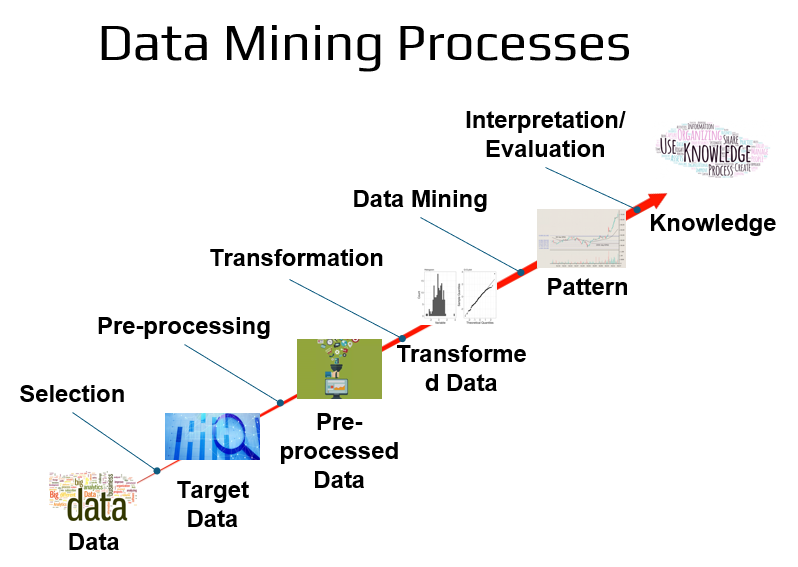

# Libraries Installation, Import and Database Setup

## Libraries Installation - Load on window

In [ ]:
pip install pandas

In [ ]:
pip install seaborn

In [ ]:
pip install matplotlib

In [ ]:
pip install scikit-learn

## Import Libraries

In [ ]:
# Import all the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Import Libraries from Google Colab

In [ ]:
from google.colab import files

## 1. Setup and Data Loading - Google Colab

### Upload irisH.csv to Colab

In [ ]:
# Upload the file
uploaded = files.upload()

Saving irisH.csv to irisH (1).csv


In [ ]:
# Load data
df = pd.read_csv("irisH.csv")
print("First 5 rows:\n", df.head(60))

First 5 rows:
     id  SepalLengthCM  SepalWidthCM  PetalLengthCM  PetalWidthCM  \
0    1            5.1           3.5            1.4           0.2   
1    2            4.9           3.0            1.4           0.2   
2    3            4.7           3.2            1.3           0.2   
3    4            4.6           3.1            1.5           0.2   
4    5            5.0           3.6            1.4           0.2   
5    6            5.4           3.9            1.7           0.4   
6    7            4.6           3.4            1.4           0.3   
7    8            5.0           3.4            1.5           0.2   
8    9            4.4           2.9            1.4           0.2   
9   10            4.9           3.1            1.5           0.1   
10  11            5.4           3.7            1.5           0.2   
11  12            4.8           3.4            1.6           0.2   
12  13            4.8           3.0            1.4           0.1   
13  14            4.3           3

# 2. Exploratory Data Analysis (EDA)

In [ ]:
# Basic stats
print("\nStatistics:\n", df.describe())


Statistics:
                id  SepalLengthCM  SepalWidthCM  PetalLengthCM  PetalWidthCM
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [ ]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 id               0
SepalLengthCM    0
SepalWidthCM     0
PetalLengthCM    0
PetalWidthCM     0
Class            0
dtype: int64


In [ ]:
# Class distribution
print("\nClass counts:\n", df["Class"].value_counts())


Class counts:
 Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


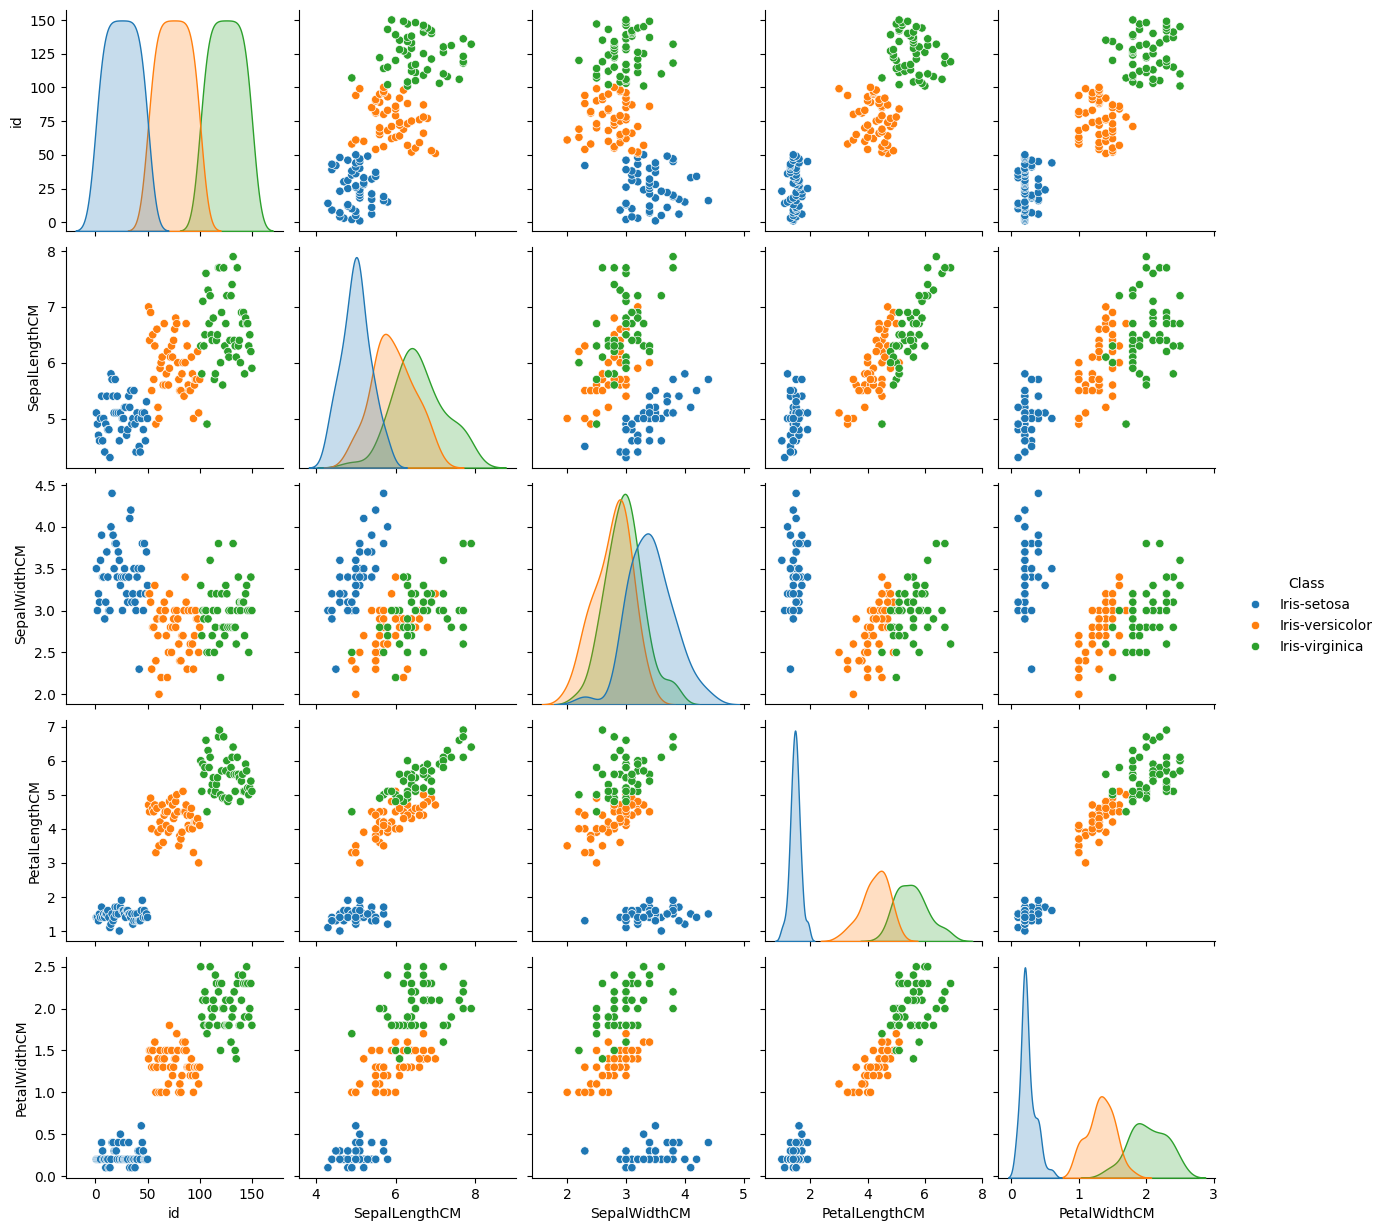

In [ ]:
# Pairplot (visualize relationships)
sns.pairplot(df, hue="Class")
plt.show()

#3. Data Preprocessing

In [ ]:
# Drop 'id' column (if irrelevant)
df = df.drop(columns=["id"])
df

,SepalLengthCM,SepalWidthCM,PetalLengthCM,PetalWidthCM,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Encode target variable
# Transform the target variable from string to numberic
le = LabelEncoder()
df["Class"] = le.fit_transform(df["Class"])  # 0: setosa, 1: versicolor, 2: virginica
df

,SepalLengthCM,SepalWidthCM,PetalLengthCM,PetalWidthCM,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# Split data
X = df.drop(columns=["Class"])
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Split data
X = df.drop(columns=["Class"])
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [ ]:
print(X_train)

     SepalLengthCM  SepalWidthCM  PetalLengthCM  PetalWidthCM
22             4.6           3.6            1.0           0.2
15             5.7           4.4            1.5           0.4
65             6.7           3.1            4.4           1.4
11             4.8           3.4            1.6           0.2
42             4.4           3.2            1.3           0.2
..             ...           ...            ...           ...
71             6.1           2.8            4.0           1.3
106            4.9           2.5            4.5           1.7
14             5.8           4.0            1.2           0.2
92             5.8           2.6            4.0           1.2
102            7.1           3.0            5.9           2.1

[120 rows x 4 columns]


In [ ]:
print(X_test)

     SepalLengthCM  SepalWidthCM  PetalLengthCM  PetalWidthCM
73             6.1           2.8            4.7           1.2
18             5.7           3.8            1.7           0.3
118            7.7           2.6            6.9           2.3
78             6.0           2.9            4.5           1.5
76             6.8           2.8            4.8           1.4
31             5.4           3.4            1.5           0.4
64             5.6           2.9            3.6           1.3
141            6.9           3.1            5.1           2.3
68             6.2           2.2            4.5           1.5
82             5.8           2.7            3.9           1.2
110            6.5           3.2            5.1           2.0
12             4.8           3.0            1.4           0.1
36             5.5           3.5            1.3           0.2
9              4.9           3.1            1.5           0.1
19             5.1           3.8            1.5           0.3
56      

In [ ]:
print(y_train)

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: Class, Length: 120, dtype: int64


In [ ]:
print(y_test)

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: Class, dtype: int64


# 4. Modeling

# We use:
# - LogisticRegression model with a maximum of 200 iteration
# - DecisionTreeClassifier model
# - RandomForestClassifier model

In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [ ]:
# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Logistic Regression Accuracy: 1.00
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00


# 5. Evaluation (Random Forest Example)

In [ ]:
# Detailed metrics
y_pred = models["Random Forest"].predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



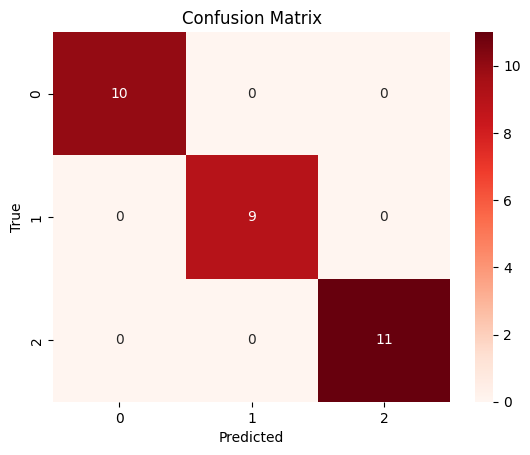

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Other colors:

Sequential (light to dark, good for ordered data)
"Blues"

"Greens"

"Oranges"

"Purples"

"Reds"

"BuGn" (blue-green)

"BuPu" (blue-purple)

"GnBu" (green-blue)

"OrRd" (orange-red)

"PuBu" (purple-blue)

"PuRd" (purple-red)

"YlGn" (yellow-green)

"YlGnBu" (yellow-green-blue)

"YlOrBr" (yellow-orange-brown)

"YlOrRd" (yellow-orange-red)


Diverging (for data with a meaningful midpoint, like z-scores)
"coolwarm"

"bwr" (blue-white-red)

"seismic"

"RdBu" (red-blue)

"BrBG" (brown-green)

"PiYG" (pink-green)

"PRGn" (purple-green)

"RdGy" (red-gray)

"RdYlBu" (red-yellow-blue)

"Spectral"


Cyclical (useful for circular data like angles)
"hsv"

"twilight"

"twilight_shifted"

"cycle"


Miscellaneous / Qualitative (less often used in heatmaps)
"Pastel1", "Pastel2"

"Set1", "Set2", "Set3"

"Paired"

"Accent"

"Dark2"

# Feature importance is a method of an attribute of tree-based models (like RandomForestClassifier or RandomForestRegressor) in scikit-learn. The method returns a 1D array showing the relative importance of each feature used by the model.
# Each value in this array corresponds to how important a specific feature was in making predictions. A higher value means the feature contributed more to the model's decisions.

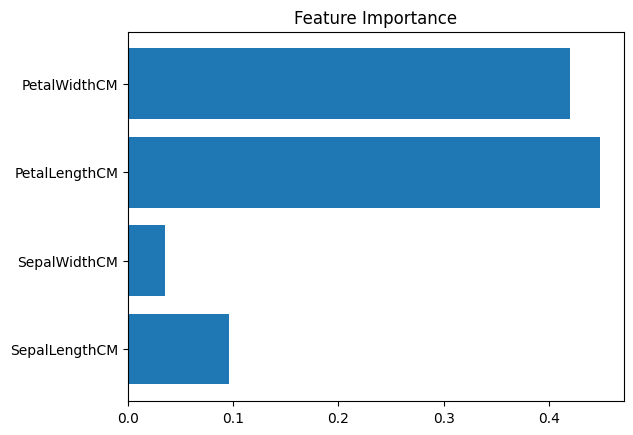

In [ ]:
# Feature importance
importances = models["Random Forest"].feature_importances_
features = X.columns
plt.barh(features, importances)
plt.title("Feature Importance")
plt.show()

# 6. Save Model (Optional)

In [ ]:
import joblib
joblib.dump(models["Random Forest"], "iris_model.pkl")
print("Model saved as 'iris_model.pkl'")

Model saved as 'iris_model.pkl'


1. Purpose of Saving the Model
Avoid Retraining: Training can take time/compute resources. Saving lets you reuse the model instantly.

Share/Deploy: You can share the .pkl file with others or deploy it in apps/APIs.

Predict New Data: Use the saved model to classify new iris measurements (e.g., from user input).

# Load the saved model and reuse it to predict unseen data

Try:
[6.2, 3.4, 5.0, 2.0] -> Iris-Virginica</br>
[5.1, 3.5, 1.4, 0.2] -> Iris-Setosa</br>
[6.0, 3.3, 4.2, 1.6] -> Iris-Versicolor</br>
[8.0, 2.8, 2.0, 4.0] -> ?

In [ ]:
import joblib

# Load the saved model
loaded_model = joblib.load("iris_model.pkl")

# Example: Predict new data (replace values with new measurements)
new_data = [[8.0, 2.8, 2.0, 4.0]]  # Format: [[SepalLength, SepalWidth, PetalLength, PetalWidth]]
prediction = loaded_model.predict(new_data)

# Map prediction back to species
species = {0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"}
print(f"Predicted class: {species[prediction[0]]}")

Predicted class: Iris-setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
